In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
#import utils  # we define some useful shortcuts here

np.random.seed(0)
pd.options.display.max_rows = 10

## 1. Import Dataset
Concrete Compressive Strength Data Set

In [2]:
df = pd.read_excel('./data/Concrete_Data.xls', sheet_name='Sheet1')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1024,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1025,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1026,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1027,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


#### Train-test split

In [3]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[:-1]], df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [4]:
from sklearn.preprocessing import MinMaxScaler
# Scale inputs
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Build a Prediction Model

In [5]:
from sklearn.metrics import mean_squared_error
def plot_predictions(y, y_hat, labels):
 
  
    plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
    y, y_hat, labels = list(
        map(
            lambda l: l if isinstance(l, list) else [l],
            [y, y_hat, labels]))
    color_list = ['blue', 'red']
    n_plots = len(y)
    y_min = min([min(z) for z in y])
    y_max = max([max(z) for z in y])
    lims = (y_min, y_max)
    fig, ax = plt.subplots(
        1, n_plots, figsize=(6*n_plots, 5),
        squeeze=False, sharex=True, sharey=True)
    for axis, target, prediction, label, color in zip(ax[0, :], y, y_hat, labels, color_list):
        # Scatter plot
        axis.scatter(target, prediction, alpha=0.3, c = color)

        # Title and labels
        rmse_value = np.sqrt(mean_squared_error(target, prediction))
        title = label + " (RMSE=%.3f)" % rmse_value
        axis.set_title(title)
        axis.set_xlabel('Target Compressive Strength (MPa)')
        axis.set_ylabel('Predicted Compressive Strength (MPa)')
        axis.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        axis.yaxis.set_tick_params(which='both', labelleft=True)

    plt.subplots_adjust(wspace = 0.3)
    plt.show()


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train_scaled, y_train)

y_hat_train = regressor.predict(X_train_scaled)
y_hat_test = regressor.predict(X_test_scaled)

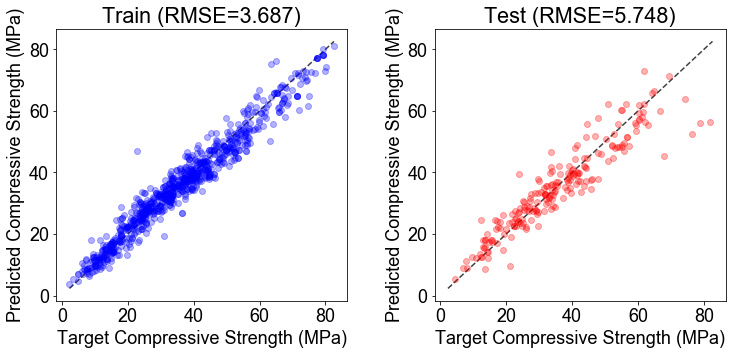

In [7]:
plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

In [14]:
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [21]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=30, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01)
est_gp.fit(X_train_scaled, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    28.80          2247.62        3          19.0206          16.3527      2.03m
   1    16.79          37.8799       11          18.1743          17.8337      1.35m
   2    33.34          40.1018       11          14.4892          13.3673      1.58m
   3    32.63          54.3693       13          12.2383          13.1375      1.56m
   4    13.46          70.3244       13          12.2512          13.0219      1.22m
   5    14.45          76.2924       21          11.3903          13.0286      1.16m
   6    13.68          84.3684       17          10.6386           10.076      1.17m
   7    13.40          121.116       17          10.4546          11.7161      1.10m
   8    13.76          130.429       13          10.3039          11.5923  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div'), generations=30,
                  init_depth=(2, 6), init_method='half and half',
                  low_memory=False, max_samples=0.9,
                  metric='mean absolute error', n_jobs=1, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=None, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

In [22]:

print(est_gp._program)

sub(div(add(add(X7, X7), add(add(mul(div(X0, X0), add(add(mul(X2, mul(div(0.820, X3), X7)), X1), X0)), X0), add(mul(X2, X7), 0.325))), 0.058), sub(sub(div(add(add(X0, X1), add(add(X4, X0), add(0.738, X4))), div(X7, 0.033)), add(X0, add(add(add(mul(mul(div(0.820, X3), X7), X7), 0.325), X5), X0))), div(X4, 0.026)))


In [23]:
y_hat_train = est_gp.predict(X_train_scaled)
y_hat_test = est_gp.predict(X_test_scaled)

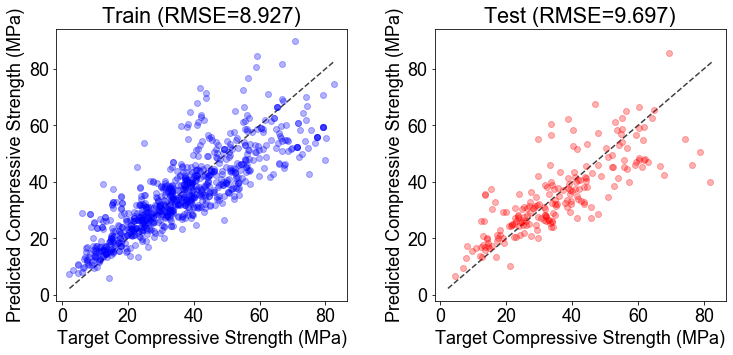

In [24]:

plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

In [26]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)

graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH